<a href="https://colab.research.google.com/github/anupambcharya/MachineLearning/blob/main/FaceRecognition/myFaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition using LBPH**

In [1]:
!git clone https://github.com/anupambcharya/machinelearning.git

Cloning into 'machinelearning'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (404/404), done.
remote: Total 419 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (419/419), 17.49 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imutils import paths
import cv2
import numpy as np
import pickle as cPickle
from google.colab.patches import cv2_imshow

In [3]:
def getLBPH(image, eps=1e-7):

		lbp = feature.local_binary_pattern(image, numPoints,radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, numPoints + 3),
			range=(0, numPoints + 2))

		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		return hist

In [4]:
def getFace(frame):

  # load the face detector
  detector = cv2.CascadeClassifier("machinelearning/FaceDetection/Cascades/haarcascade_frontalface_default.xml")

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  faceRects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

  # loop over the faces and draw a rectangle around each
  if len(faceRects)>0:
      for (x, y, w, h) in faceRects:
          faceIMG = gray[y:y+h,x:x+w]
          cv2.rectangle(image, (x, y), (x + w, y + h), (255,0, 0), 3)
          return faceIMG


In [5]:
numPoints = 24
radius = 8

detector = cv2.CascadeClassifier("machinelearning/FaceRecognition/Cascade/haarcascade_frontalface_default.xml")

data = []
labels = []


In [6]:
for imagePath in paths.list_images("machinelearning/FaceRecognition/Data/Training"):
	image = cv2.imread(imagePath)
	print (imagePath)
	face_img = getFace(image)
	hist = getLBPH(face_img)
	labels.append(imagePath.split("/")[-2])
	data.append(hist)

machinelearning/FaceRecognition/Data/Training/Virat/2.jpg
machinelearning/FaceRecognition/Data/Training/Virat/11.jpg
machinelearning/FaceRecognition/Data/Training/Virat/7.jpg
machinelearning/FaceRecognition/Data/Training/Virat/12.jpg
machinelearning/FaceRecognition/Data/Training/Virat/3.jpg
machinelearning/FaceRecognition/Data/Training/Virat/5.jpg
machinelearning/FaceRecognition/Data/Training/Virat/10.jpg
machinelearning/FaceRecognition/Data/Training/Virat/9.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/2.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/8.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/7.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/4.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/3.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/6.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/5.jpg
machinelearning/FaceRecognition/Data/Training/Rohit/1.jpg


In [7]:
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(data, labels)
f = open("classifier.cPickle", "wb")
f.write(cPickle.dumps(model))
f.close()

In [8]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

# evaluate the classifier
print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] evaluating...
              precision    recall  f1-score   support

       Rohit       1.00      1.00      1.00         1
       Virat       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [9]:
loaded_model = cPickle.load(open("classifier.cPickle", 'rb'))

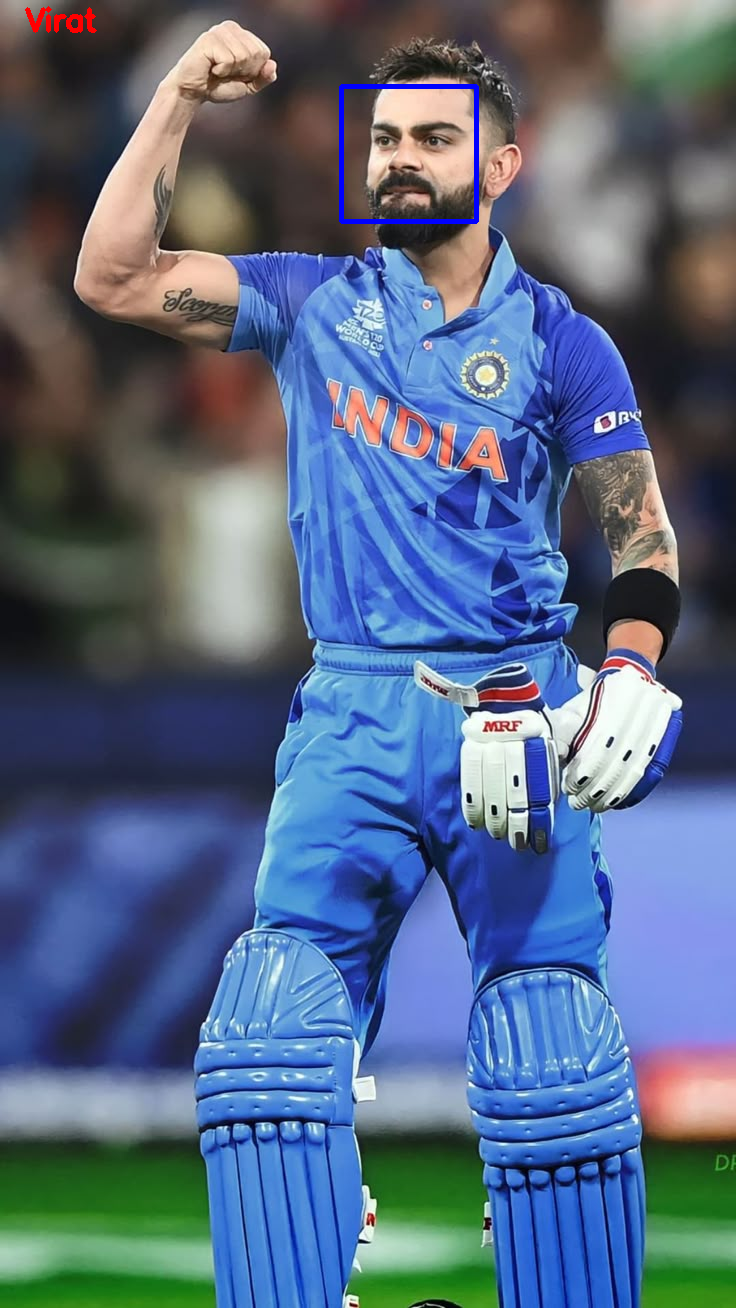

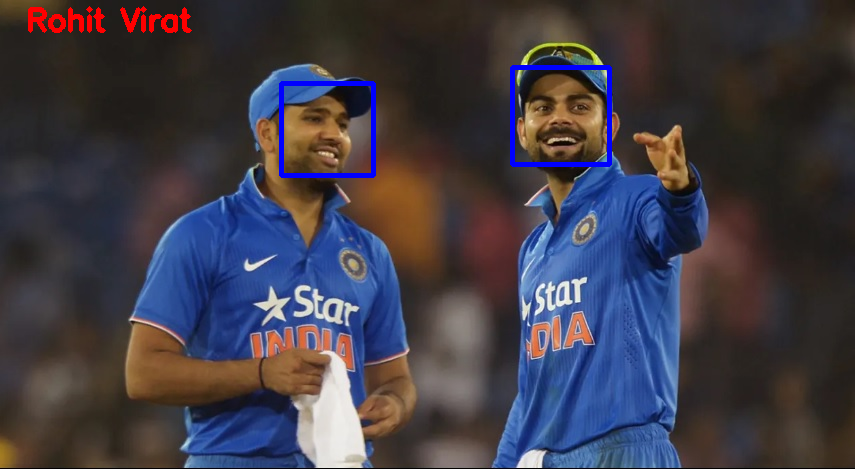

In [10]:
for imagePath in paths.list_images("machinelearning/FaceRecognition/Data/Testing"):
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	faceRects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
	completePrediction = ""
	if len(faceRects)>0:
		for (x, y, w, h) in faceRects:
			face_img = gray[y:y+h,x:x+w]
			cv2.rectangle(image, (x, y), (x + w, y + h), (255,0, 0), 3)
			hist = getLBPH(face_img)
			prediction = loaded_model.predict(hist.reshape(1, -1))[0]
			completePrediction = completePrediction + " " + prediction


		cv2.putText(image, completePrediction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
		cv2_imshow(image)
